<div style="display: flex; background-color: RGB(204,0,102);" >
<h1 style="margin: auto; padding: 30px; ">La Préduction des frais de livraison </h1>
</div>

<div style="background-color: RGB(218,112,214);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Librairies et fichiers csv</h2>
</div>

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">1.1 - Importation des librairies</h3>
</div>

In [31]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 


<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">1.2 - Importation de fichier csv</h3>
</div>

In [2]:
data_base = pd.read_csv("data_base.csv")

<div style="background-color: RGB(218,112,214);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 2 - Analyse et models</h2>
</div>

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.1 - Choix des données</h3>
</div>

In [3]:

data= data_base[["product_price", "weight", "lenght", "height", "width", "distance", "prix_de_livraison"]]
data= data.dropna()
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]


<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.2 - Divisez les données</h3>
</div>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [5]:
X_test

,product_price,weight,lenght,height,width,distance
23717,93.00,2850.0,40.0,5.0,44.0,829.870460
86601,79.00,8550.0,60.0,20.0,29.0,366.375514
58572,59.90,600.0,68.0,8.0,13.0,890.185770
2350,99.90,584.0,16.0,11.0,13.0,529.355549
7391,21.99,250.0,17.0,4.0,12.0,18.692544
...,...,...,...,...,...,...
50217,133.00,650.0,18.0,18.0,18.0,166.353903
51731,89.90,600.0,27.0,13.0,27.0,887.454847
49545,237.00,292.0,18.0,10.0,15.0,302.814111
67104,44.99,200.0,16.0,16.0,13.0,118.580649


In [6]:
Y_test

23717    21.73
86601    29.95
58572    14.17
2350      0.00
7391      7.78
         ...  
50217    14.51
51731    15.39
49545    14.10
67104    12.79
96354    12.69
Name: prix_de_livraison, Length: 22416, dtype: float64

<div style="border: 1px solid RGB(218,112,214);" >
<h3 style="margin: auto; padding: 20px; color: RGB(218,112,214); ">2.3 - Création de model et la prédiction </h3>
</div>

<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Linear</h3>
</div>

In [7]:
#construire le modèle

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#faire des prédictions
Y_pred = regressor.predict(X_test)
Y_pred

array([23.52895663, 31.8600925 , 19.56739955, ..., 14.28024118,
        9.24797785, 21.99521957])

Coefficients: 
 [0.01672704 0.00208825 0.03719081 0.05443888 0.01673303 0.01002626]
Mean squared error: 117.86
Coefficient of determination: 0.56


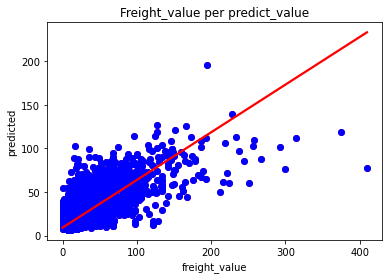

In [20]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');
plt.scatter(Y_test,Y_pred, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


In [34]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(regressor, param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, Y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(Y_test, grid_predictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: Invalid parameter C for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Ridge</h3>
</div>

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=1.0)

Mean MAE: 5.367 (0.181)
[23.52895666 31.86009252 19.56739949 ... 14.28024122  9.24797786
 21.99521954]
Coefficient of determination: 0.56


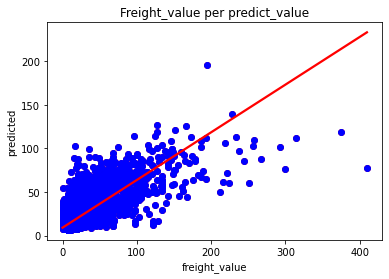

In [10]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# fit model
model.fit(X_train , Y_train)

# make a prediction
y_hat = model.predict(X_test)
# summarize prediction
print( y_hat)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_hat))

sns.regplot(x=Y_test,y=y_hat,ci=None,color ='red');
plt.scatter(Y_test,y_hat, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');

In [37]:
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters
param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}
# define search
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, Y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression Lasso</h3>
</div>

In [11]:
from sklearn.linear_model import Lasso , LassoCV
from sklearn.model_selection import GridSearchCV

# define model
lasso = Lasso(alpha= 0.01)
# fit model
lasso.fit(X_train, Y_train)

y_las = lasso.predict(X_test)

print(lasso.score(X_test,Y_test))
print(lasso.coef_)
print(lasso.intercept_)

0.5580569321917599
[0.0167269  0.00208864 0.03715692 0.05434956 0.01665184 0.01002622]
5.208859656737134


Coefficients: 
 [0.0167269  0.00208864 0.03715692 0.05434956 0.01665184 0.01002622]
Mean squared error: 117.86
Coefficient of determination: 0.56


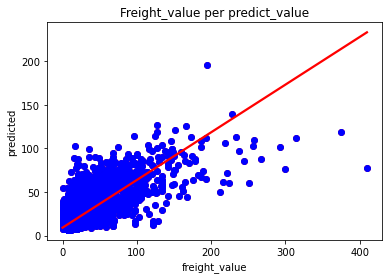

In [12]:
sns.regplot(x=Y_test,y=y_las,ci=None,color ='red');
plt.scatter(Y_test,y_las, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');
# The coefficients
print("Coefficients: \n", lasso.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_las))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_las))


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Regression ElasticNet</h3>
</div>

In [13]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)

print(regr.coef_)

print(regr.intercept_)

y_reg = regr.predict(X_test)

print(regr.score(X_test, Y_test))

[0.01671981 0.00210814 0.03540789 0.04976632 0.01266245 0.01002432]
5.39064966171148
0.5580478227581265


Coefficients: 
 [0.01671981 0.00210814 0.03540789 0.04976632 0.01266245 0.01002432]
Mean squared error: 117.86
Coefficient of determination: 0.56


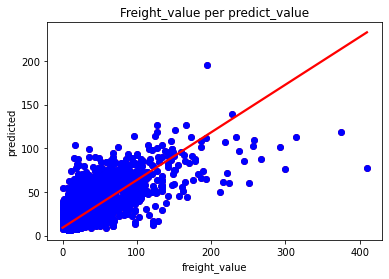

In [14]:
sns.regplot(x=Y_test,y=y_reg,ci=None,color ='red');
plt.scatter(Y_test,y_reg, color='blue')
plt.title('Freight_value per predict_value')
plt.xlabel('freight_value');
plt.ylabel('predicted');
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_reg))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_reg))


<div style="background-color: RGB(64,224,208);" >
<h3 style="margin: auto; padding: 20px; color: RGB(128,0,128); "> Dummy Regressor</h3>
</div>

In [15]:

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error



dummy_mean = DummyRegressor(strategy = 'mean')
dummy_mean.fit(X_train, Y_train)

dummy_median = DummyRegressor(strategy = 'median').fit(X_train, Y_train)
dummy_median.fit(X_train, Y_train)


y_predict_dummy_mean = dummy_mean.predict(X_test)
y_predict_dummy_median = dummy_median.predict(X_test)
y_predict_dummy_median

array([16.25, 16.25, 16.25, ..., 16.25, 16.25, 16.25])

In [17]:
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(Y_test, 
                                                                     y_predict_dummy_mean)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(Y_test, 
                                                                    y_predict_dummy_median)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(Y_test, y_predict_dummy_mean)))

print("r2_score (dummy median): {:.2f}".format(r2_score(Y_test, y_predict_dummy_median)))


Mean squared error (dummy): 266.70
Median absolute error (dummy): 3.65
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.06
